In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:

import time
import datetime

##time_now
now = datetime.datetime.now()
print(now)


2020-05-28 19:52:37.172146


In [3]:
x = datetime.datetime.now()

print(x.strftime("%x"))

05/28/20


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

%pip --version

pip 20.0.2 from /Users/richardfallow/opt/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
Note: you may need to restart the kernel to use updated packages.


In [56]:
# For some reason I cannot get the web api to work, potentially it has been disallowed
# Data is imported manually from csv under 'time series'

#import urllib
#from IPython.core.display import HTML

#HTML("<iframe src=https://www.health.govt.nz/our-work/diseases-and-conditions/covid-19-novel-coronavirus/covid-19-current-situation/covid-19-current-cases width=1100 height=500></iframe>")


In [57]:
# imports
import requests # How Python gets the webpages
import re
from openpyxl import workbook  
from openpyxl import load_workbook  # Creates structured, searchable object
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

import os

In [58]:
# Data output to excel format

In [59]:
import xlsxwriter

In [8]:
workbook   = xlsxwriter.Workbook('NZdata.xlsx')
worksheet1 = workbook.add_worksheet()
worksheet2 = workbook.add_worksheet()

worksheet1.write('A1', 123)

workbook.close()

In [9]:
from pylab import rcParams # this module gives us some controls over plot rendering attributes
rcParams['figure.figsize'] = 15, 10

###  Time Series Data (ts)

In [10]:
ts_data = pd.read_csv(r"/Users/richardfallow/Desktop/Covid-19 Project/COSC480_Covid/data/Total_nz.csv")

ts_data.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,26/02/2020,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1154.0,4.794
1,27/02/2020,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,28/02/2020,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,29/02/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,1/03/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [11]:
ts_data.tail()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
92,28/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,29/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,30/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,31/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                97 non-null     object 
 1   Total to date                       91 non-null     float64
 2   New in last 24 hours                91 non-null     float64
 3   Total confirmed and probable cases  62 non-null     float64
 4   New confirmed and probable cases    66 non-null     float64
 5   Total of Recovered                  61 non-null     float64
 6   New Recovered                       60 non-null     float64
 7   Total of deaths                     91 non-null     float64
 8   New deaths                          91 non-null     float64
 9   Total                               1 non-null      float64
 10  Total population(million - 2017)    1 non-null      float64
dtypes: float64(10), object(1)
memory usage: 8.5+ KB

In [14]:
ts_data_forecast = ts_data
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,26/02/2020,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1154.0,4.794
1,27/02/2020,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,28/02/2020,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,29/02/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,1/03/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [15]:
ts_data_forecast['Date'] = pd.to_datetime(ts_data_forecast['Date'])
ts_data_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                97 non-null     datetime64[ns]
 1   Total to date                       91 non-null     float64       
 2   New in last 24 hours                91 non-null     float64       
 3   Total confirmed and probable cases  62 non-null     float64       
 4   New confirmed and probable cases    66 non-null     float64       
 5   Total of Recovered                  61 non-null     float64       
 6   New Recovered                       60 non-null     float64       
 7   Total of deaths                     91 non-null     float64       
 8   New deaths                          91 non-null     float64       
 9   Total                               1 non-null      float64       
 10  Total population(million - 2

In [16]:
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1154.0,4.794
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-03,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [17]:
ts_data_forecast['Total to date'].max()

1154.0

### Converting into Time Series Data

In [18]:
ts_data_total = ts_data.set_index(['Date','Total to date','New in last 24 hours'])
ts_data_total.head()

,,,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
Date,Total to date,New in last 24 hours,,,,,,,,
2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1154.0,4.794
2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-03,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [19]:
ts_data_total.columns

Index(['Total confirmed and probable cases',
       'New confirmed and probable cases', 'Total of Recovered',
       'New Recovered', 'Total of deaths', 'New deaths', 'Total',
       'Total population(million - 2017)'],
      dtype='object')

In [20]:
N = len(ts_data_forecast)
ind = np.arange(N)

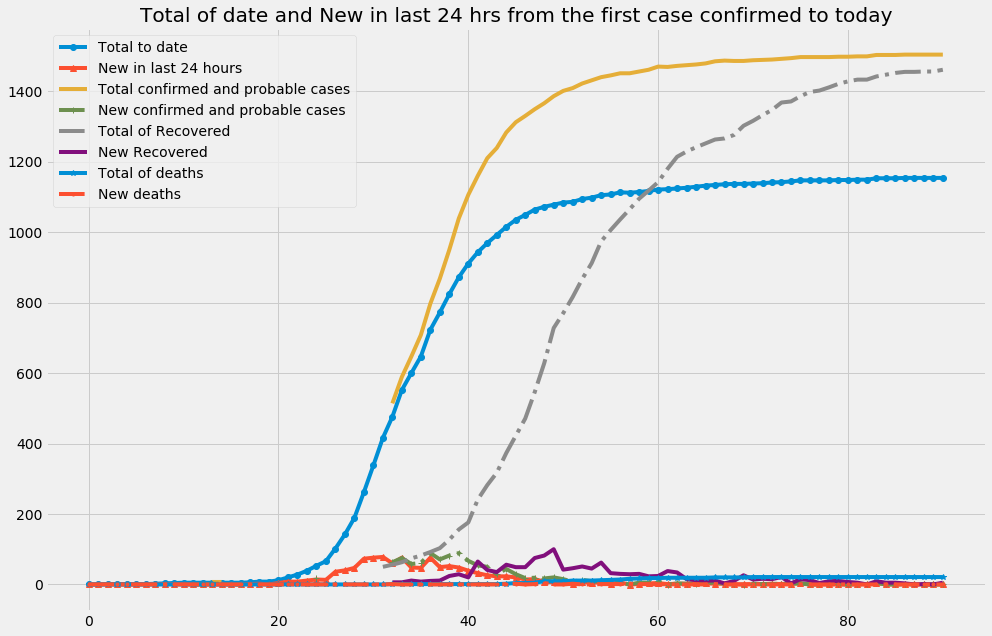

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ind, ts_data_forecast['Total to date'], 'o-', label='Total to date')
ax.plot(ind, ts_data_forecast['New in last 24 hours'], '^-', label='New in last 24 hours')
ax.plot(ind, ts_data_forecast['Total confirmed and probable cases'], '-', label='Total confirmed and probable cases')
ax.plot(ind, ts_data_forecast['New confirmed and probable cases'], '-.+', label='New confirmed and probable cases')
ax.plot(ind, ts_data_forecast['Total of Recovered'], '-.', label='Total of Recovered')
ax.plot(ind, ts_data_forecast['New Recovered'], '-', label='New Recovered')
ax.plot(ind, ts_data_forecast['Total of deaths'], '*-', label='Total of deaths')
ax.plot(ind, ts_data_forecast['New deaths'], '.-.', label='New deaths')

ax.set_title(u"Total of date and New in last 24 hrs from the first case confirmed to today")
ax.legend(loc='upper left')

plt.show()

In [22]:
ts_data_forecast['shifted'] = ts_data_forecast['Total to date'].shift(1)
ts_data_forecast

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017),shifted
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1154.0,4.794,NaN
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0
4,2020-01-03,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92,2020-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2020-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2020-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# population
N = 4794000
# simuation Time / Day
T = 28

In [25]:
def Logisticfquation(t,N,P0,r):
    t0=0
    exp_index=np.exp(r*t-t0)
    return(N*exp_index*P0)/N+(exp_index-1)*P0

In [26]:
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.integrate as spi
import numpy as np
# import pylab as pl
import matplotlib.pyplot as pl
import pandas as pd

In [27]:
ts_data_forecast['ID'] = ts_data_forecast.index
ts_data_forecastts_1 = ts_data_forecast

In [28]:
ts_data_forecastts_1.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017),shifted,ID
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1154.0,4.794,NaN,0
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,2
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,3
4,2020-01-03,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,4


In [29]:
t = np.array(ts_data_forecastts_1["ID"])
P = np.array(ts_data_forecastts_1["Total to date"])

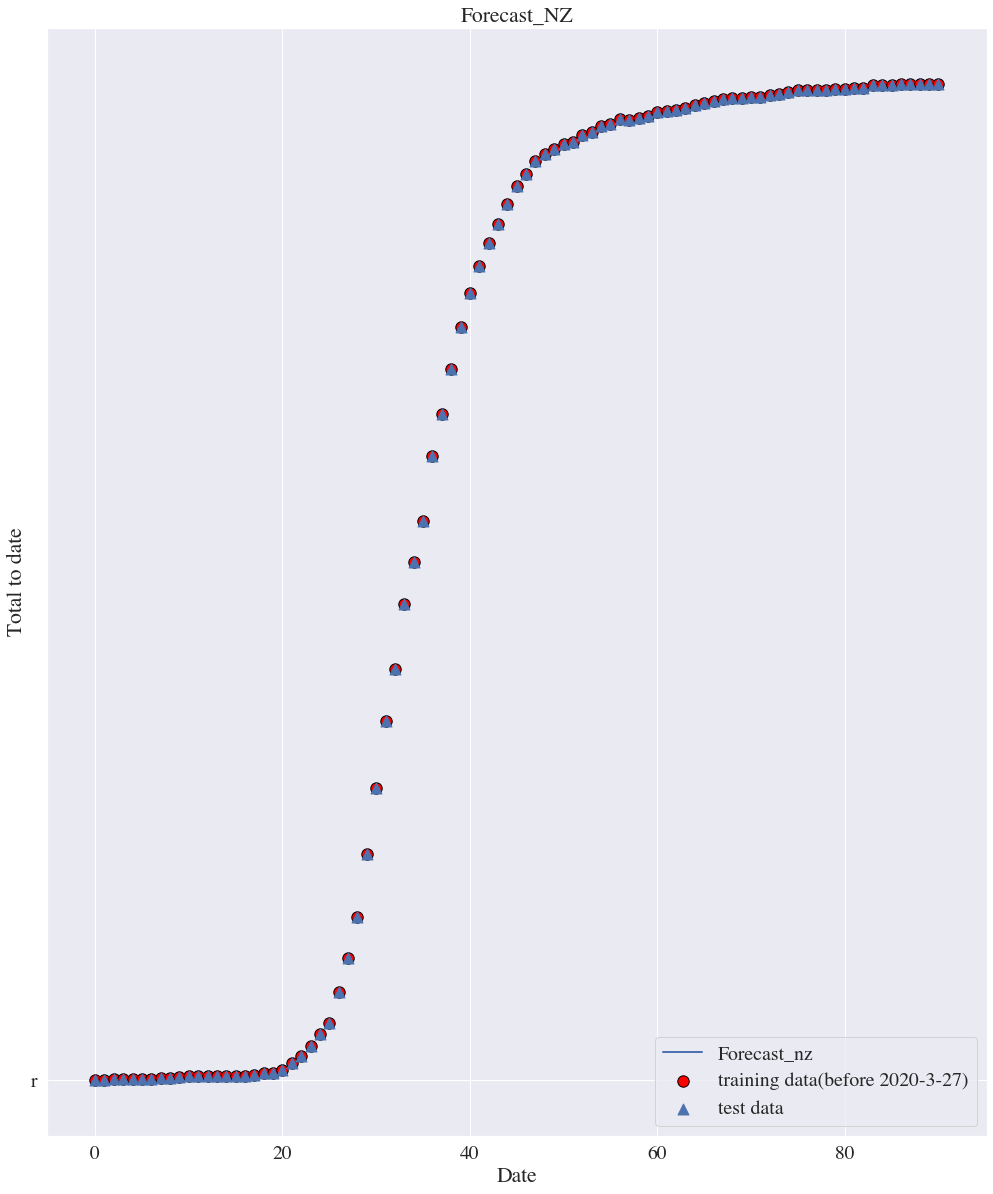

In [30]:
sns.set(font_scale = 1.8, font = 'Times')
df_future = ts_data_forecast
fig,ax = plt.subplots(figsize=(15,19))
ax.plot( 'r', lw=2, label = 'Forecast_nz')
ax.scatter(t,P,s=130,facecolor='red',edgecolors='black',
           label='training data(before 2020-3-27)')
ax.scatter(df_future['ID'],df_future['Total to date'],s=120,marker='^',
            label='test data')

plt.legend(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Total to date')
plt.title('Forecast_NZ')
plt.show()

In [31]:
ts_data_forecastts_1.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017),shifted,ID
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1154.0,4.794,NaN,0
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,2
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,3
4,2020-01-03,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,4


In [33]:
import random

[3.e+04 1.e+00 0.e+00]
[3.00000000e+04 1.00002033e+00 4.78314337e-06]
[3.00000000e+04 1.00002033e+00 4.78324060e-06]
[2.99999999e+04 1.00004066e+00 9.56648121e-06]
[2.99999999e+04 1.00004066e+00 9.56657844e-06]
[2.99999937e+04 1.00512229e+00 1.20524568e-03]
[2.99999937e+04 1.00512233e+00 1.20525334e-03]
[2.99999874e+04 1.01022975e+00 2.40700057e-03]
[2.99999874e+04 1.01022982e+00 2.40701593e-03]
[2.99999810e+04 1.01536319e+00 3.61486982e-03]
[2.99999810e+04 1.01536326e+00 3.61488525e-03]
[2.99999547e+04 1.03666062e+00 8.62603602e-03]
[2.99999547e+04 1.03666110e+00 8.62614863e-03]
[2.99999616e+04 1.03108315e+00 7.31368831e-03]
[2.99999616e+04 1.03108341e+00 7.31374908e-03]
[2.99999419e+04 1.04704722e+00 1.10699463e-02]
[2.99999419e+04 1.04704699e+00 1.10698930e-02]
[2.99999219e+04 1.06325768e+00 1.48841841e-02]
[2.99999219e+04 1.06325770e+00 1.48841897e-02]
[2.99999015e+04 1.07971936e+00 1.87575351e-02]
[2.99999015e+04 1.07971939e+00 1.87575409e-02]
[2.99998599e+04 1.11341112e+00 2.6685

         Date  Total to date  New in last 24 hours  \
0  2020-02-26            0.0                   0.0   
1  2020-02-27            0.0                   0.0   
2  2020-02-28            1.0                   1.0   
3  2020-02-29            1.0                   0.0   
4  2020-01-03            1.0                   0.0   
..        ...            ...                   ...   
92 2020-05-28            NaN                   NaN   
93 2020-05-29            NaN                   NaN   
94 2020-05-30            NaN                   NaN   
95 2020-05-31            NaN                   NaN   
96 2020-01-06            NaN                   NaN   

    Total confirmed and probable cases  New confirmed and probable cases  \
0                                  NaN                               NaN   
1                                  NaN                               NaN   
2                                  NaN                               NaN   
3                                  NaN         

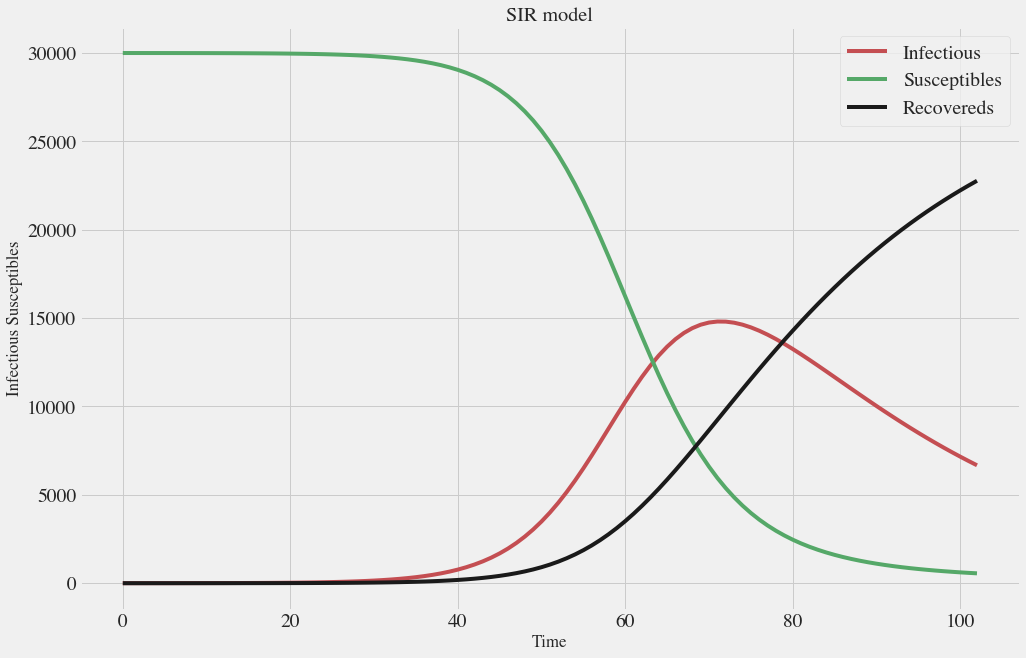

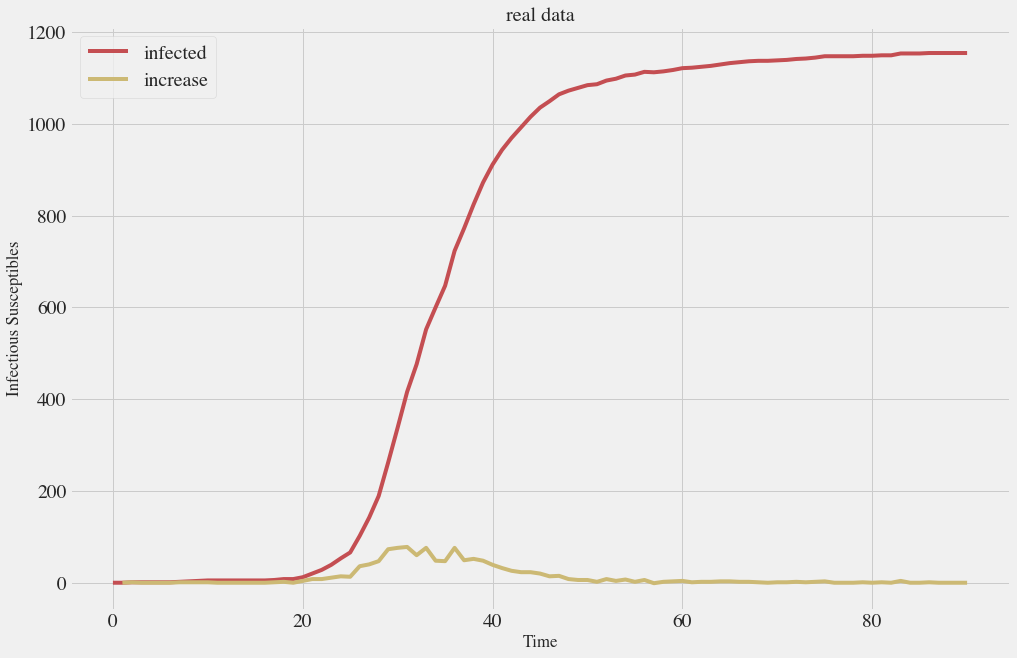

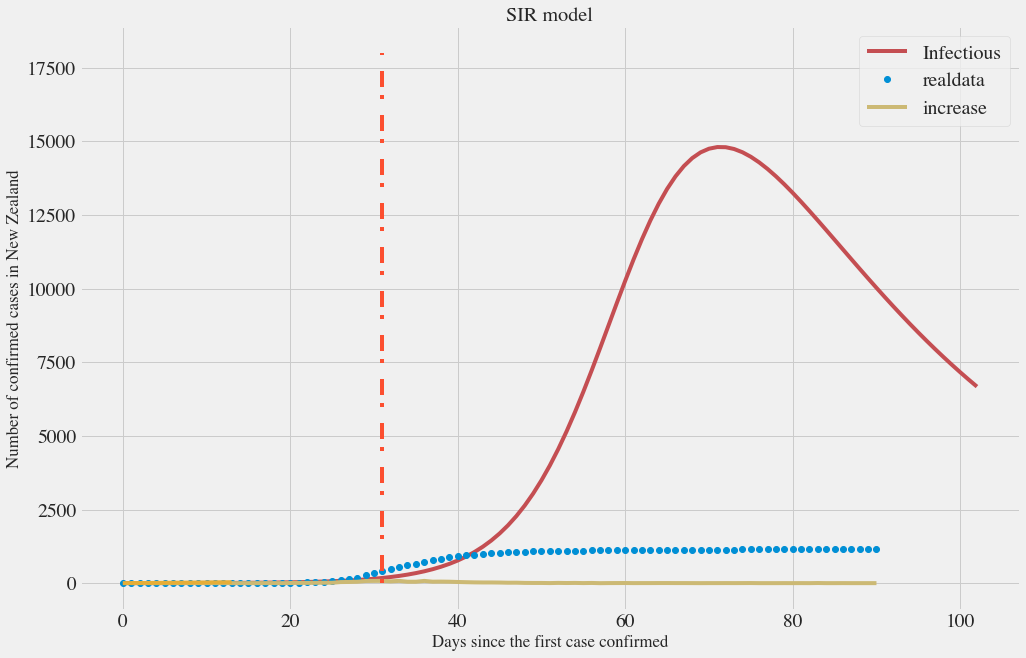

In [61]:
d1 = datetime.datetime(2020,2,26)   
d2 = datetime.datetime.now()  
interval = d2 - d1                   
n = interval.days 

# SIR model variable

beta = 8e-6
gamma = 0.04

### lockdown check point start

x111 = 1
if (n-28) < 14:
    print("check point 1")
    ### change value of TS and TS1 below
    #TS= random.uniform(0.98,0.886)
    TS= random.uniform(0.9415,0.9471)
    TS_add = random.uniform(0.007,0.015)
    #TS_add = random.uniform(0.015,0.023)
    TS1=TS + TS_add
        
if (n-28) >= 14:
    TS= random.uniform(0.97,0.973)
    TS1=random.uniform(0.973,0.9736)
    x111 = 1
    for x111 in range(51-28-21):
        TS -= 0.003
        TS1 -= 0.003
        
elif (n-28) >= 21:
    x111 = 1
    TS= random.uniform(0.96,0.959)
    TS1=random.uniform(0.973,0.9736)
    for x111 in range(51-28-21):
        TS -= -0.005
        TS1 -= -0.005
        
### lockdown check point end

TS = 0.983 #0.97 #0.99085 #0.95 #0.983
TS1 = 1.00125 #0.983 #0.993
ND = 100.0
S0 = 30000
I0 = 1
S1 = 30000
I1 = 1
INPUT = [S0, I0, 0.0]
INPUT_1 = [S1, I1, 0.0]


def diff_eqs(INP, t):
    Y = np.zeros((3))
    V = INP
    print(V)
    Y[0] = -beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y

# Main plotting inputs

if __name__ == "__main__":
    t_start = 0.0
    t_start_1 = 0.0
    t_end = ND
    t_inc = TS
    t_inc_1 = TS1
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    t_range_1 = np.arange(t_start_1, t_end+t_inc_1, t_inc_1)
    t_range_2 = np.arange(t_start, t_end+t_inc, t_inc)
    RES = spi.odeint(diff_eqs, INPUT, t_range)
    
    RES_1 = spi.odeint(diff_eqs, INPUT_1, t_range_1)
    
    RES_2 = spi.odeint(diff_eqs, INPUT, t_range_2)
    print(S0,I0)
    print(RES)
    print(len(RES))

    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(RES[:, 0], "-g", label = "Susceptibles")
    pl.plot(RES[:, 2], "-k", label = "Recovereds")
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("SIRresult.png")

# SIR model data
    data = ts_data_forecastts_1
    print(data)

# Real data model
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(data["Total to date"], "-r", label = "infected")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
    pl.legend(loc = 0)
    pl.title("real data")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("realdata.png")

# SIR model with lockdown emposed 
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(data["Total to date"], "o", label = "realdata")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
    #plt.annotate(s='Lockdown',xy=(31,262),xytext=(31,100))
    #plt.annotate('Lockdown', xy=(31, 262) ,xytext=(31, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
    plt.plot([31,31],[0,18000],dashes=[1,2,4,4])
    plt.plot([13,0],[31,0])
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Days since the first case confirmed")
    pl.ylabel("Number of confirmed cases in New Zealand")
    pl.savefig("testSIR.png")
    print("Total of forecast:%d loc:%d" % (RES[31:32,1].max(), 32))

In [39]:
TS,TS1,n

(0.983, 1.00125, 92)

In [40]:
d1 = datetime.datetime(2020,2,26)   
d2 = datetime.datetime.now()  
interval = d2 - d1                   
interval.days 


92

In [41]:
d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_now

'2020-5-28'

In [43]:
# Results overview 

In [44]:
print("Forecast - COVID-19 in NZ")
d1 = datetime.datetime(2020,2,26)   
d2 = datetime.datetime.now()  
interval = d2 - d1                   
n = interval.days 

tomorrow = datetime.datetime.now() + datetime.timedelta(days=1) 

d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_tomorrow =  ("%d-%d-%d" % (tomorrow.year, tomorrow.month, tomorrow.day))
print("\nDate of today : %s" % d2_now)
print("Date of tomorrow : %s\n" % d2_tomorrow)

print("Days since the first case confirmed: %d" % (n-1))

print("\n")

print("Days in lockdown: %d" % (n-28))

print("Total of now(day:%d): %d " % (n-1,ts_data_forecast['Total to date'].max()))
print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,ts_data_forecast['Total confirmed and probable cases'].max()))
print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,RES_1[n-1:n,1].max()))
print("\n")


print("Total of forecast: %d      The date to be predicted: %s" % (RES[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new csses: %d\n" % (RES[n:n+1,1].max()-ts_data_forecast['Total to date'].max()))

print("Total of forecast(including in both confirmed and probable cases): %d      The date to be predicted: %s" % (RES_1[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new cases: %d\n" % (RES_1[n:n+1,1].max()-ts_data_forecast['Total confirmed and probable cases'].max()))

print("Prediction - The maxinum number of cases in NZ : %d on day since the first case confirmed: %d " % (RES[:,1].max(), np.argmax(RES[:, 1])-1))


Forecast - COVID-19 in NZ

Date of today : 2020-5-28
Date of tomorrow : 2020-5-29

Days since the first case confirmed: 91


Days in lockdown: 64
Total of now(day:91): 1154 
Total of now(day:91) & including in both confirmed and probable cases: 1504
Total of now(day:91) & including in both confirmed and probable cases: 6628


Total of forecast: 6799      The date to be predicted: 2020-5-29
Prediction - 24hrs new csses: 5645

Total of forecast(including in both confirmed and probable cases): 6382      The date to be predicted: 2020-5-29
Prediction - 24hrs new cases: 4878

Prediction - The maxinum number of cases in NZ : 16034 on day since the first case confirmed: 61 


In [55]:
# I had planned to add more graphs and do more projections with probable and confirmed data but to get to this point has taken a lot of time 
# So I have left some of the data cleaning code and intend to continue to develop and modify the code and try other senarios with SIER model values etc.

In [45]:
50-28-21

1

In [46]:
def createCounter():
    x111 = 1
    def counter():
        nonlocal x111 
        x111 += 1
        return x111
    return counter
print("%d" % x111)

1


In [47]:
### lockdown check point start
x111 = 1
if (n-28) < 14:
    print("check point 1")
    ### change value of TS and TS1 below
    TS= random.uniform(0.983,1)
    TS1=random.uniform(0.993,1)
    while TS >= TS1:
        TS= random.uniform(0.983,1)
        TS1=random.uniform(0.993,1)
if (n-28) >= 14:
    TS= random.uniform(0.97,0.973)
    TS1=random.uniform(0.973,0.9736)
    x111 = 1
    for x111 in range(51-28-21):
        TS -= 0.003
        TS1 -= 0.003
        
elif (n-28) >= 21:
    x111 = 1
    TS= random.uniform(0.96,0.959)
    TS1=random.uniform(0.973,0.9736)
    for x111 in range(51-28-21):
        TS -= -0.005
        TS1 -= -0.005
### lockdown check point end

TS, TS1, n


(0.9660699515923209, 0.9671860063637696, 92)

In [48]:
test_data_1 = pd.read_csv(r"/Users/richardfallow/Desktop/Covid-19 Project/COSC480_Covid/data/probable.csv", encoding= 'unicode_escape')

test_data_1.head()

,ï»¿Date notified of potential case,Sex,Age group,DHB,Overseas travel,Last country before return,Flight number,Flight departure date,Arrival date
0,08/05/2020,Female,40 to 49,WaitematÄ,No,NaN,NaN,NaN,NaN
1,05/05/2020,Male,40 to 49,Auckland,No,NaN,NaN,NaN,NaN
2,01/05/2020,Female,20 to 29,Auckland,No,NaN,NaN,NaN,NaN
3,01/05/2020,Male,30 to 39,WaitematÄ,No,NaN,NaN,NaN,NaN
4,26/04/2020,Female,50 to 59,Taranaki,No,NaN,NaN,NaN,NaN


In [49]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ï»¿Date notified of potential case  350 non-null    object
 1   Sex                                 350 non-null    object
 2   Age group                           350 non-null    object
 3   DHB                                 350 non-null    object
 4   Overseas travel                     350 non-null    object
 5   Last country before return          54 non-null     object
 6   Flight number                       36 non-null     object
 7   Flight departure date               35 non-null     object
 8   Arrival date                        54 non-null     object
dtypes: object(9)
memory usage: 24.7+ KB


In [50]:
test_data_1.loc()

In [51]:
test_data_1["DHB"].astype('category').values

[WaitematÄ, Auckland, Auckland, WaitematÄ, Taranaki, ..., Auckland, Auckland, Southern, Counties Manukau, WaitematÄ]
Length: 350
Categories (20, object): [Auckland, Bay of Plenty, Canterbury, Capital and Coast, ..., Wairarapa, WaitematÄ, West Coast, Whanganui]

In [52]:
test_data_1["DHB"].astype('category')

0            WaitematÄ
1              Auckland
2              Auckland
3            WaitematÄ
4              Taranaki
             ...       
345            Auckland
346            Auckland
347            Southern
348    Counties Manukau
349          WaitematÄ
Name: DHB, Length: 350, dtype: category
Categories (20, object): [Auckland, Bay of Plenty, Canterbury, Capital and Coast, ..., Wairarapa, WaitematÄ, West Coast, Whanganui]

In [53]:
df_test_data_1= test_data_1.groupby('DHB') 
df_test_data_1.head()

,ï»¿Date notified of potential case,Sex,Age group,DHB,Overseas travel,Last country before return,Flight number,Flight departure date,Arrival date
0,08/05/2020,Female,40 to 49,WaitematÄ,No,NaN,NaN,NaN,NaN
1,05/05/2020,Male,40 to 49,Auckland,No,NaN,NaN,NaN,NaN
2,01/05/2020,Female,20 to 29,Auckland,No,NaN,NaN,NaN,NaN
3,01/05/2020,Male,30 to 39,WaitematÄ,No,NaN,NaN,NaN,NaN
4,26/04/2020,Female,50 to 59,Taranaki,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
303,29/03/2020,Female,70+,South Canterbury,No,NaN,NaN,NaN,NaN
324,26/03/2020,Female,60 to 69,Northland,Yes,United States of America,NaN,18/03/2020,19/03/2020
325,26/03/2020,Female,15 to 19,Taranaki,Yes,United Kingdom,NaN,NaN,22/03/2020
330,25/03/2020,Male,20 to 29,MidCentral,No,NaN,NZ526,25/03/2020,NaN


In [54]:
df_test_data_1_1 = test_data_1.groupby(['DHB', 'Sex'])
df_test_data_1_1.head()

,ï»¿Date notified of potential case,Sex,Age group,DHB,Overseas travel,Last country before return,Flight number,Flight departure date,Arrival date
0,08/05/2020,Female,40 to 49,WaitematÄ,No,NaN,NaN,NaN,NaN
1,05/05/2020,Male,40 to 49,Auckland,No,NaN,NaN,NaN,NaN
2,01/05/2020,Female,20 to 29,Auckland,No,NaN,NaN,NaN,NaN
3,01/05/2020,Male,30 to 39,WaitematÄ,No,NaN,NaN,NaN,NaN
4,26/04/2020,Female,50 to 59,Taranaki,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
324,26/03/2020,Female,60 to 69,Northland,Yes,United States of America,NaN,18/03/2020,19/03/2020
325,26/03/2020,Female,15 to 19,Taranaki,Yes,United Kingdom,NaN,NaN,22/03/2020
330,25/03/2020,Male,20 to 29,MidCentral,No,NaN,NZ526,25/03/2020,NaN
334,24/03/2020,Male,40 to 49,Bay of Plenty,No,NaN,NaN,NaN,NaN
